<a href="https://colab.research.google.com/github/venkateshpaturu/venkatesh-HDS/blob/main/week13_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [ ]:
# Import library
import pandas as pd

# Read the dataset ('/content/training_data_final.csv')
# For CSV file
data = pd.read_csv('/content/training_data_final.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
print(data.head())

# Dimensions of the dataset
rows, columns = data.shape
print(f"\nThe dataset contains {rows} rows and {columns} columns.")


First 5 rows of the dataset:
   id_semester_evaluation  sem_present_count  sem_absent_count  \
0                       1                 98                 2   
1                       2                 76                24   
2                       3                 81                19   
3                       4                 98                 2   
4                       5                 92                 8   

   sem_eval_lec_test_1_mark  sem_eval_lab_test_1_mark  \
0                        27                        30   
1                        16                        16   
2                        17                        17   
3                        28                        30   
4                        25                        24   

   semester_evaluation_mid_mark  sem_eval_lec_test_2_mark  \
0                            29                        29   
1                            16                        16   
2                            17                 

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [ ]:
# Count the unique values for each column
unique_counts = data.nunique()
print("Number of unique values in each column:")
print(unique_counts)

# column with the greatest number of distinct values
most_diverse_column = unique_counts.idxmax()
most_distinct_values = unique_counts.max()
print(f"\nColumn with the greatest number of distinct values: {most_diverse_column} ({most_distinct_values} unique values)")

# Generally unique identifier columns usually have unique counts equal to the number of rows
if unique_counts[most_diverse_column] == len(data):
    next_most_diverse_column = unique_counts.drop(most_diverse_column).idxmax()
    next_most_distinct_values = unique_counts[next_most_diverse_column]
    print(f"\nColumn with the next greatest number of distinct values: {next_most_diverse_column} ({next_most_distinct_values} unique values)")


Number of unique values in each column:
id_semester_evaluation               690
sem_present_count                     30
sem_absent_count                      30
sem_eval_lec_test_1_mark              18
sem_eval_lab_test_1_mark              18
semester_evaluation_mid_mark          18
sem_eval_lec_test_2_mark              18
sem_eval_lab_test_2_mark              18
semester_evaluation_pre_gtu_mark      18
semester_evaluation_internal_mark     16
semester_evaluation_gtu_mark          31
dtype: int64

Column with the greatest number of distinct values: id_semester_evaluation (690 unique values)

Column with the next greatest number of distinct values: semester_evaluation_gtu_mark (31 unique values)


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [ ]:
# Finding the redundant columns

redundant_columns = [col for col in data.columns if data[col].nunique() == 1]
if redundant_columns:
    print("\nColumns with the same value in every row:")
    print(redundant_columns)

else:
    print("\nNo redundant columns found.")



No redundant columns found.


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [ ]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include='number').columns
print("\nNumeric columns available for histogram:")
print(numeric_columns)


Numeric columns available for histogram:
Index(['id_semester_evaluation', 'sem_present_count', 'sem_absent_count',
       'sem_eval_lec_test_1_mark', 'sem_eval_lab_test_1_mark',
       'semester_evaluation_mid_mark', 'sem_eval_lec_test_2_mark',
       'sem_eval_lab_test_2_mark', 'semester_evaluation_pre_gtu_mark',
       'semester_evaluation_internal_mark', 'semester_evaluation_gtu_mark'],
      dtype='object')


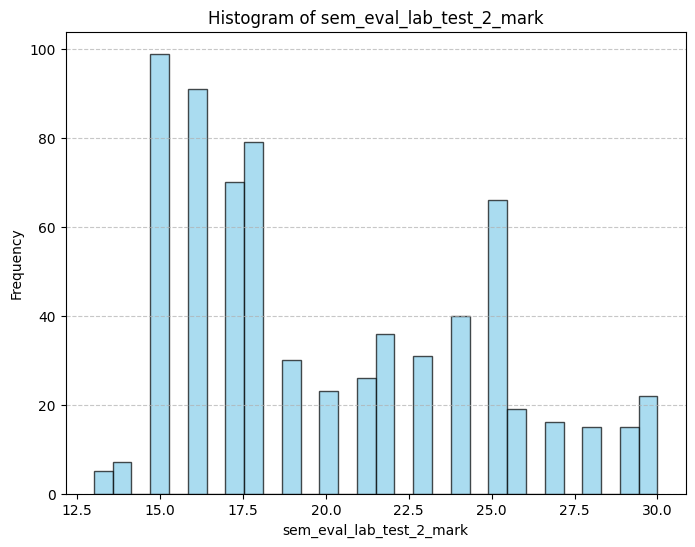

In [ ]:
import matplotlib.pyplot as plt

column = 'sem_eval_lab_test_2_mark'

plt.figure(figsize=(8, 6))
plt.hist(data[column].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title(f"Histogram of {column}")
plt.xlabel(column)
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)


Summary statistics for numeric columns:
       id_semester_evaluation  sem_present_count  sem_absent_count  \
count              690.000000         690.000000        690.000000   
mean               345.500000          84.976812         15.023188   
std                199.330128           8.736892          8.736892   
min                  1.000000          70.000000          1.000000   
25%                173.250000          77.000000          7.000000   
50%                345.500000          85.000000         15.000000   
75%                517.750000          93.000000         23.000000   
max                690.000000          99.000000         30.000000   

       sem_eval_lec_test_1_mark  sem_eval_lab_test_1_mark  \
count                690.000000                690.000000   
mean                  20.097101                 20.062319   
std                    4.369125                  4.425864   
min                   13.000000                 13.000000   
25%                   1

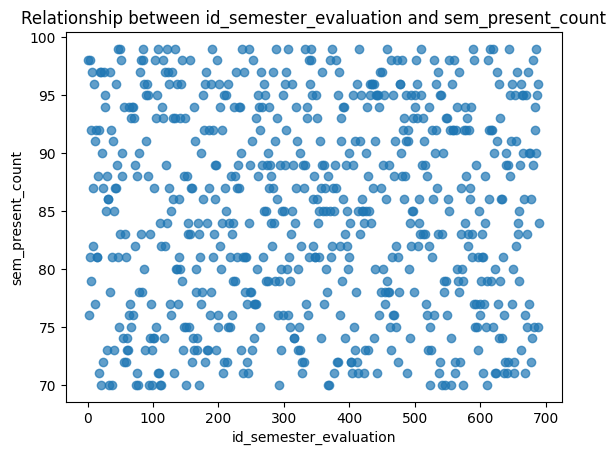

In [ ]:
import matplotlib.pyplot as plt

# Summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
print(data.describe())

# Exploring the relationships between two numeric columns sem present count and id sem evaluation
if len(numeric_columns) >= 2:
    plt.scatter(data[numeric_columns[0]], data[numeric_columns[1]], alpha=0.7)
    plt.title(f"Relationship between {numeric_columns[0]} and {numeric_columns[1]}")
    plt.xlabel(numeric_columns[0])
    plt.ylabel(numeric_columns[1])
    plt.show()
else:
    print("\nNot enough numeric columns to explore relationships.")




---



## Submitting Your Work

Submit your work as usual.